<a href="https://colab.research.google.com/github/shemalperera/EDAonHealthcare/blob/main/EDAonHealthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pune Medical/EDA Health.csv')

In [107]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [108]:
data.shape

(110527, 14)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [110]:
#date and time into standard format
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [112]:
data['sch_weekday'] = data['ScheduledDay'].dt.dayofweek
data['app_weekday'] = data['AppointmentDay'].dt.dayofweek

In [113]:
data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [114]:
data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [115]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [116]:
#changing the name of some cloumns
data= data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [118]:
# dropping some columns which have no significance
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [120]:
data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


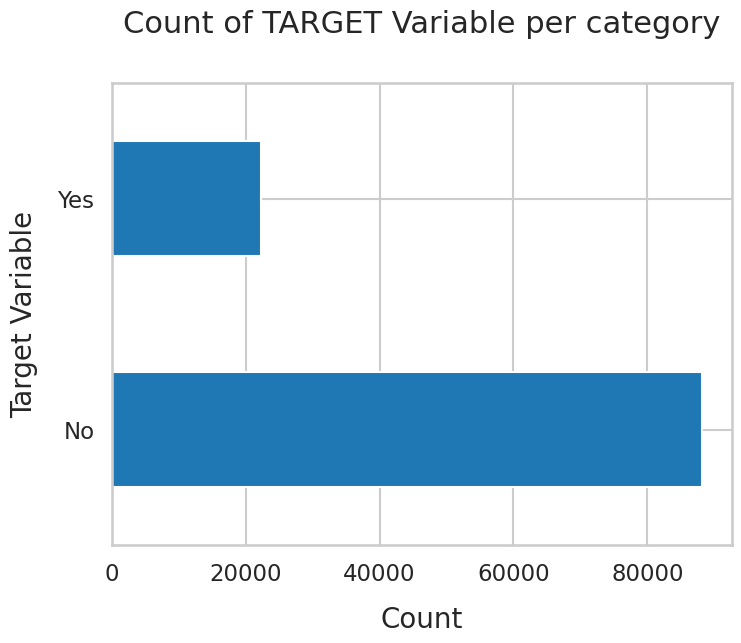

In [121]:
data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [122]:
# percentage of appoinments
100*data['NoShow'].value_counts()/len(data['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

             index    0
0           Gender  0.0
1     ScheduledDay  0.0
2   AppointmentDay  0.0
3              Age  0.0
4      Scholarship  0.0
5     Hypertension  0.0
6         Diabetes  0.0
7       Alcoholism  0.0
8         Handicap  0.0
9      SMSReceived  0.0
10          NoShow  0.0
11     sch_weekday  0.0
12     app_weekday  0.0


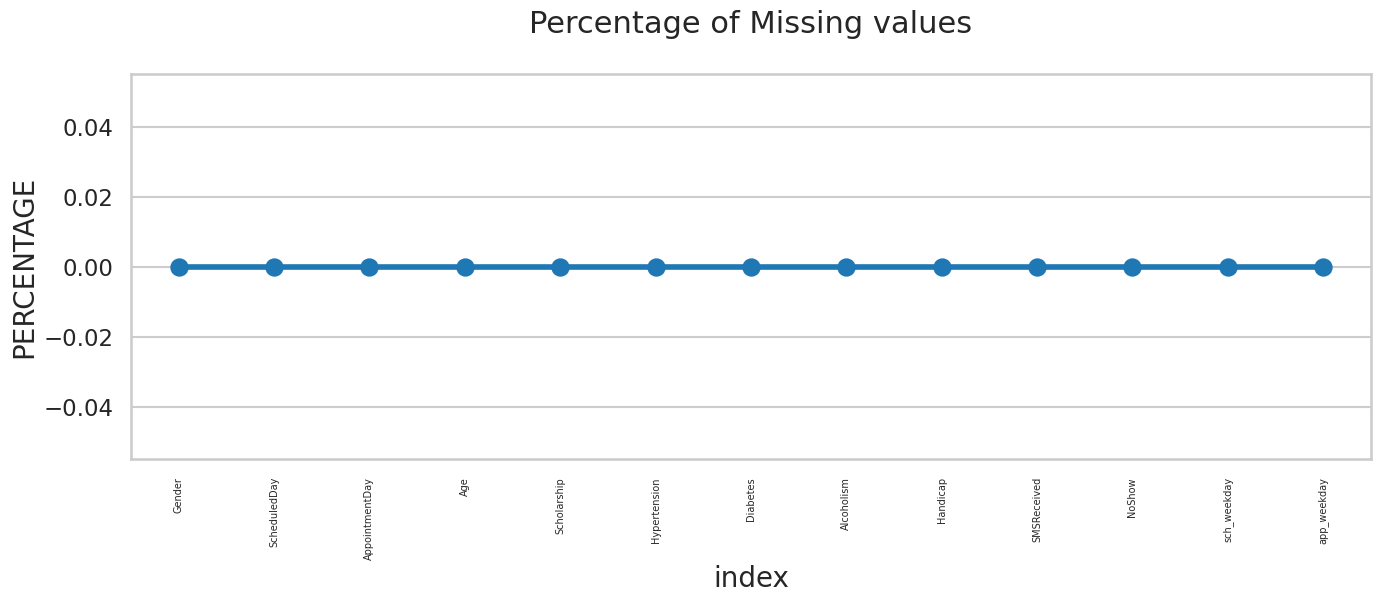

In [123]:
# Looking for data contains missing values or not
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
print(missing)
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Missing Data** \
Here we don't have any missing data.

**Data cleaning**


In [124]:
new_data = data.copy()

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB



As we don't have any null records, there's no data cleaning required

In [126]:
print(data['Age'].max())

115


In [127]:
#grouping data
labels = ["{0} - {1}".format(i,i+20) for i in range(1, 118, 20)]
data['Age_group'] = pd.cut(data.Age, range(1,130,20), right=False, labels=labels)

In [128]:
data.drop(['Age'], axis=1, inplace=True)

**Data Exploration**

In [129]:
list(data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

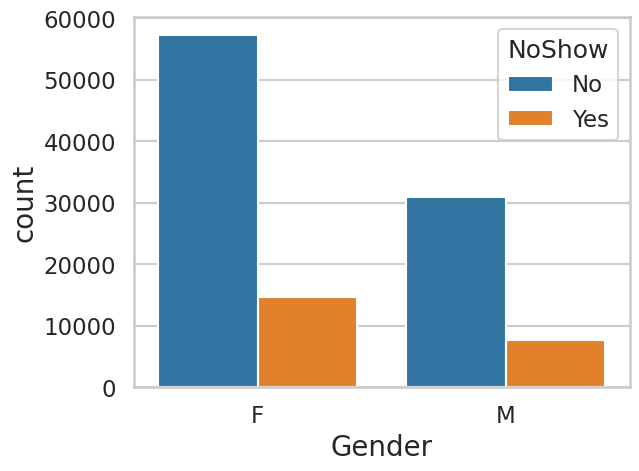

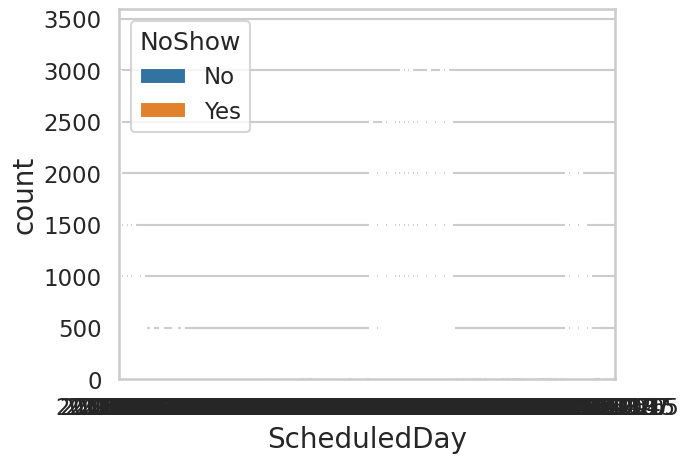

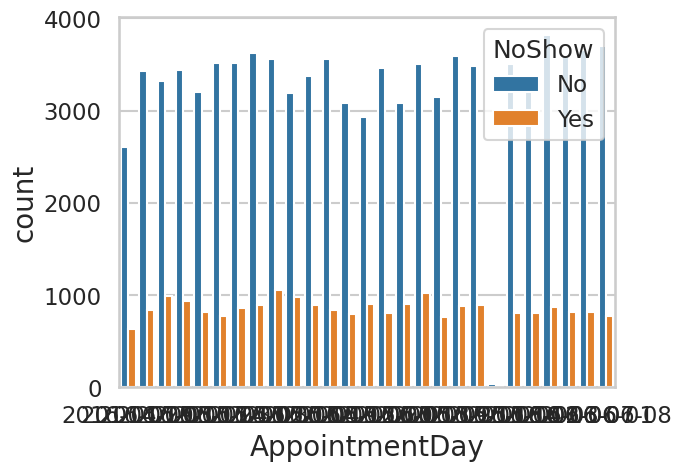

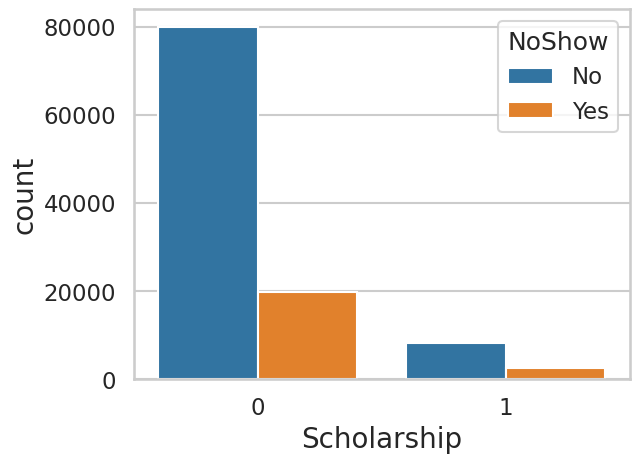

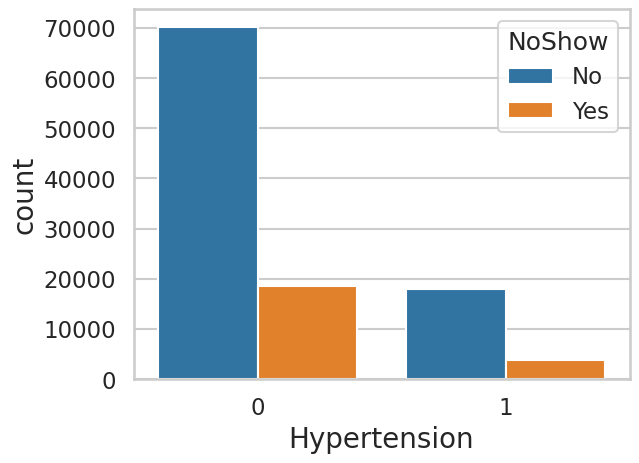

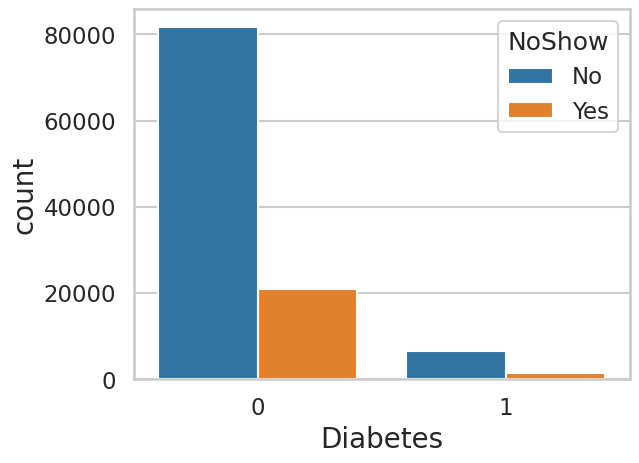

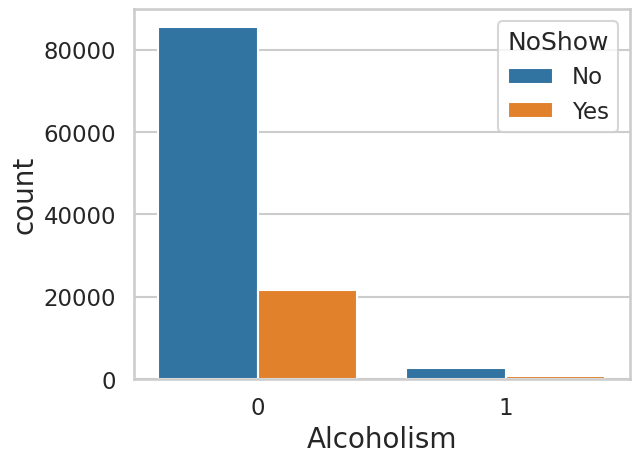

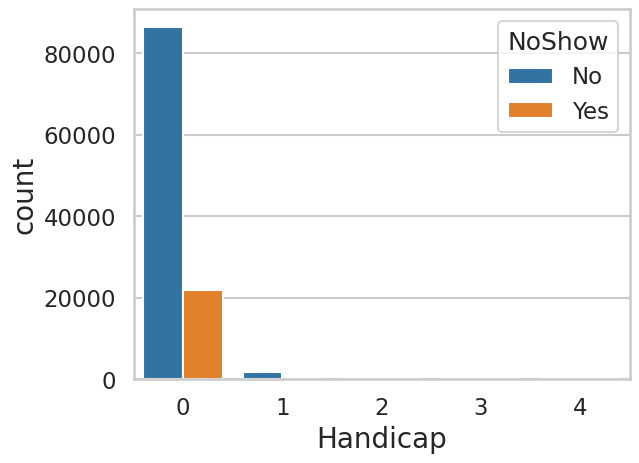

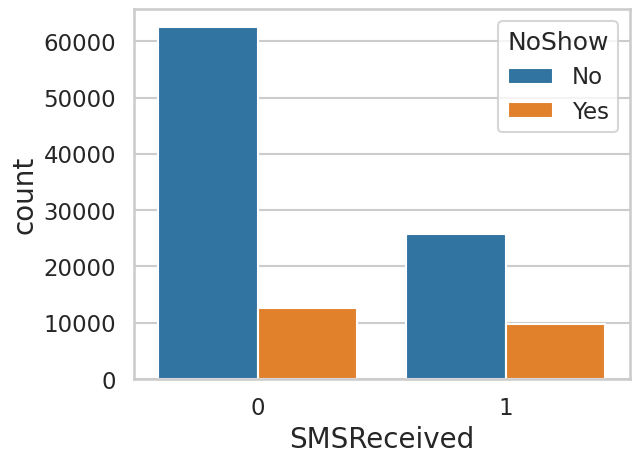

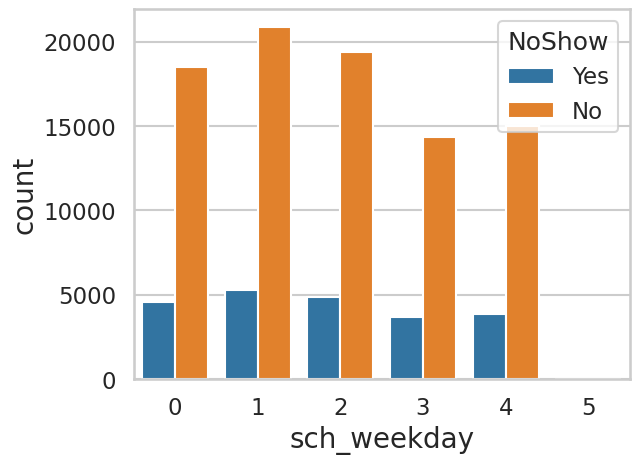

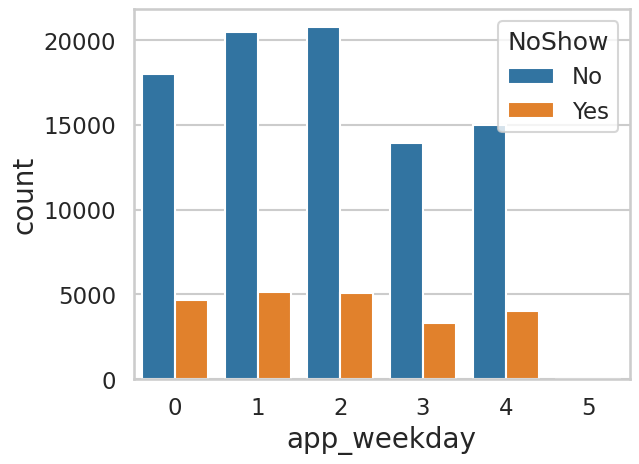

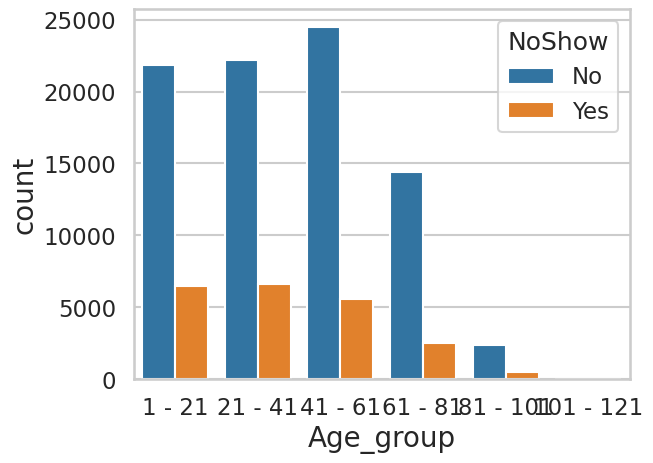

In [130]:

#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='NoShow')

In [131]:
data['NoShow'] = np.where(data.NoShow == 'Yes',1,0)

In [132]:
data['NoShow'].value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64


Convert all the categorical variables into dummy variables

In [133]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


Build a corelation of all predictors with 'NoShow'

<Axes: >

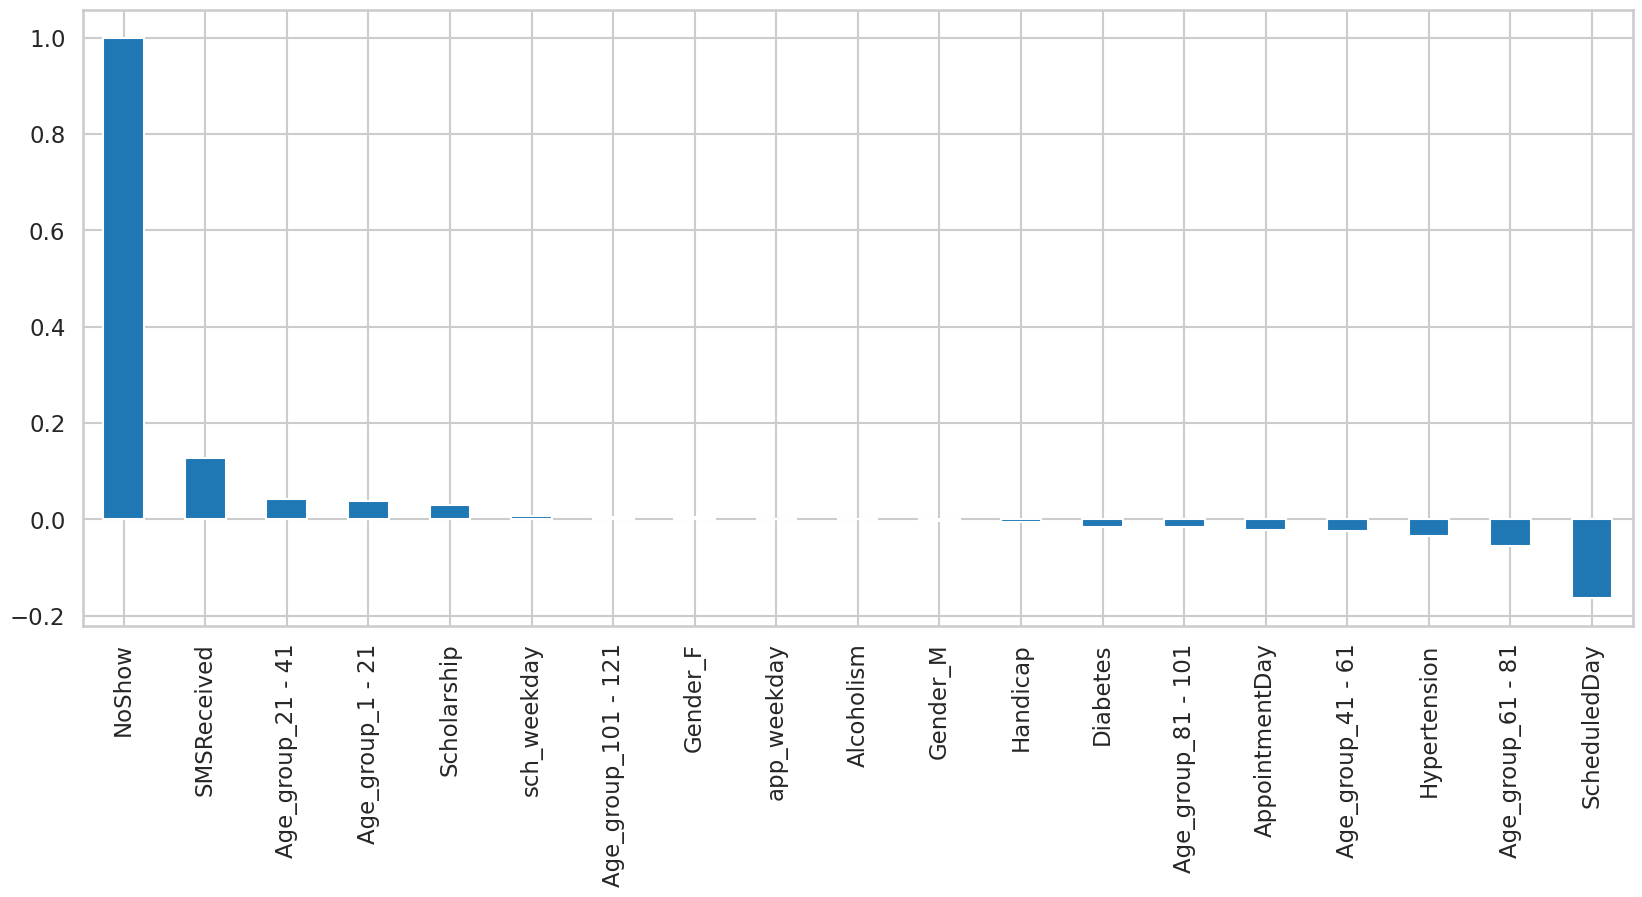

In [134]:
plt.figure(figsize=(20,8))
data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

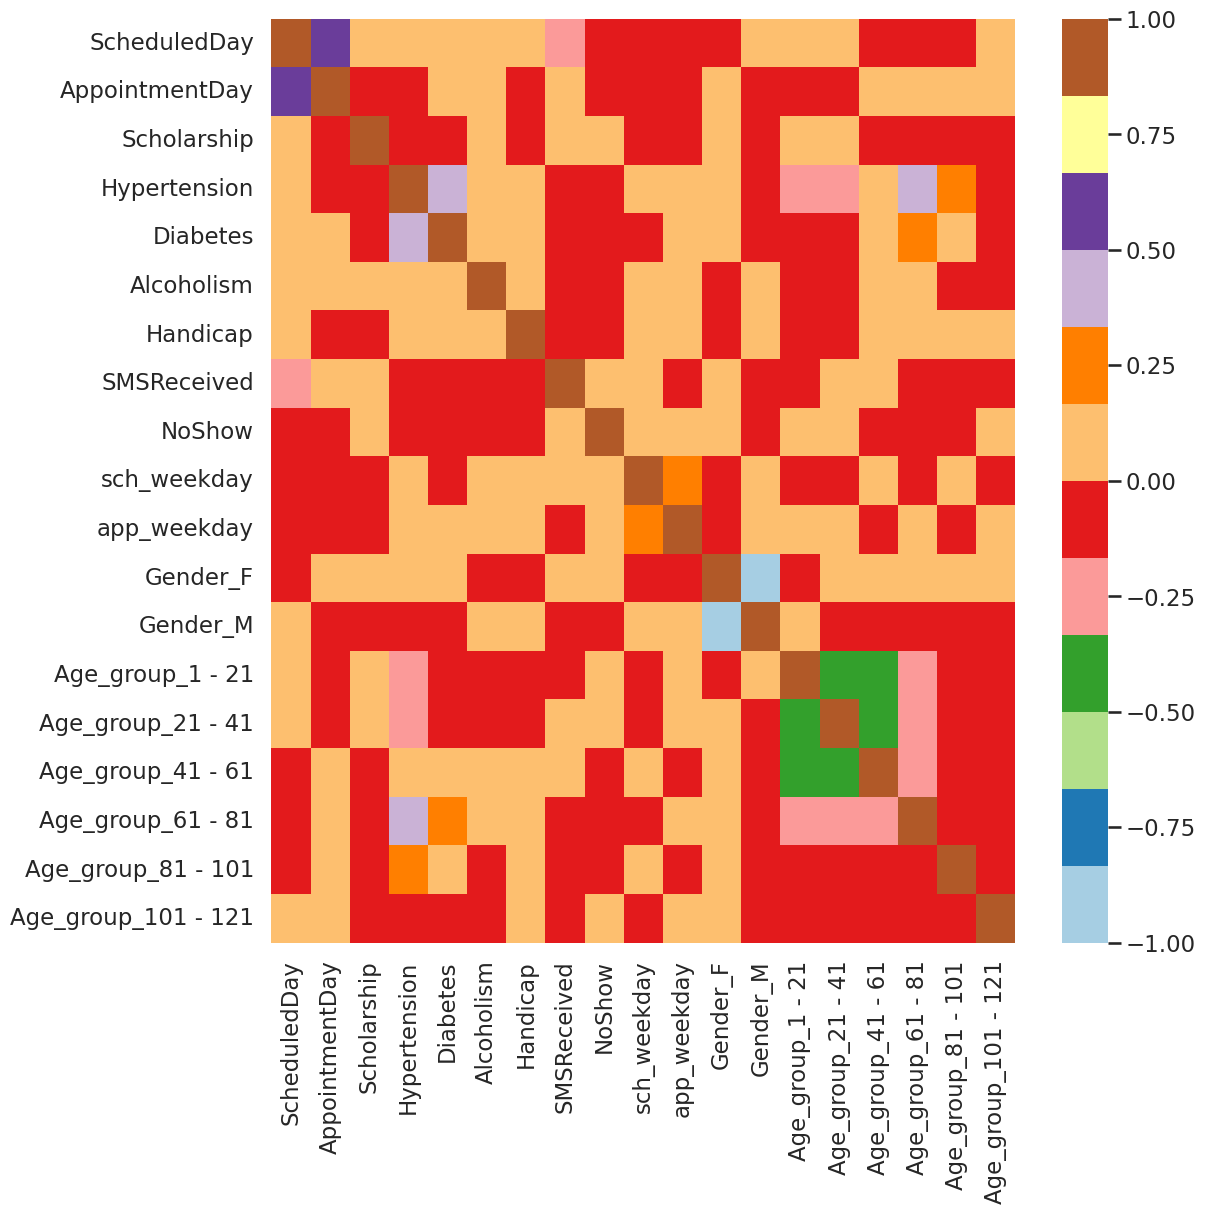

In [135]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

**Univariate, Bivariate and Multivariate data and its analysis** \

*Univariate data*  \
Measurement or observation of a single characteristic or attribute for each individual or item in the dataset.\

*Bivariate data* \
Bivariate data involves two different variables, and the analysis of this type of data focuses on understanding the relationship or association between these two variables. \

*Multivariate data* \
Multivariate data refers to datasets where each observation or sample point consists of multiple variables or features.



**Bivariate Analysis**

In [136]:

new_df1_target0=data.loc[data["NoShow"]==0]
new_df1_target1=data.loc[data["NoShow"]==1]

In [137]:
new_df1_target1

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group
6,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
7,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
11,M,2016-04-26,2016-04-29,0,0,0,0,0,1,1,1,4,21 - 41
17,F,2016-04-28,2016-04-29,1,0,0,0,0,0,1,3,4,21 - 41
20,F,2016-04-27,2016-04-29,0,0,0,0,0,0,1,2,4,21 - 41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03,2016-06-07,0,0,0,0,0,0,1,4,1,41 - 61
110492,M,2016-06-08,2016-06-08,0,1,0,0,0,0,1,2,2,21 - 41
110496,F,2016-06-06,2016-06-08,0,1,0,0,0,0,1,0,2,21 - 41
110515,M,2016-06-06,2016-06-08,0,1,0,0,0,0,1,0,2,21 - 41


In [138]:
# dropping some columns which have no significance
#new_df1_target0.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
#new_df1_target1.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [155]:
def plot_grouped_bar(df, main_col, hue_col, title='Grouped Bar Plot', log_scale=False):
    """
    Plots a grouped bar graph that shows the count of each unique value in main_col,
    divided by the unique values in hue_col.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    main_col (str): The column to plot on the x-axis.
    hue_col (str): The column to use for color encoding (grouping).
    title (str): The title of the plot.
    log_scale (bool): Whether to use a logarithmic scale for the y-axis. Default is False.
    """
    sns.set_style('whitegrid')
    sns.set_context('talk')

    # Set Matplotlib parameters for label sizes and title padding
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Determine the width of the plot based on the number of unique values
    width = len(df[main_col].unique()) + 7 + 4 * len(df[hue_col].unique())
    fig.set_size_inches(width, 8)

    # Rotate x-ticks for better readability
    plt.xticks(rotation=45)

    # Set y-axis to logarithmic scale if specified
    if log_scale:
        plt.yscale('log')

    # Set the plot title
    plt.title(title)

    # Create the count plot
    ax = sns.countplot(data=df, x=main_col, hue=hue_col, palette='bright')

    # Display the plot
    plt.show()

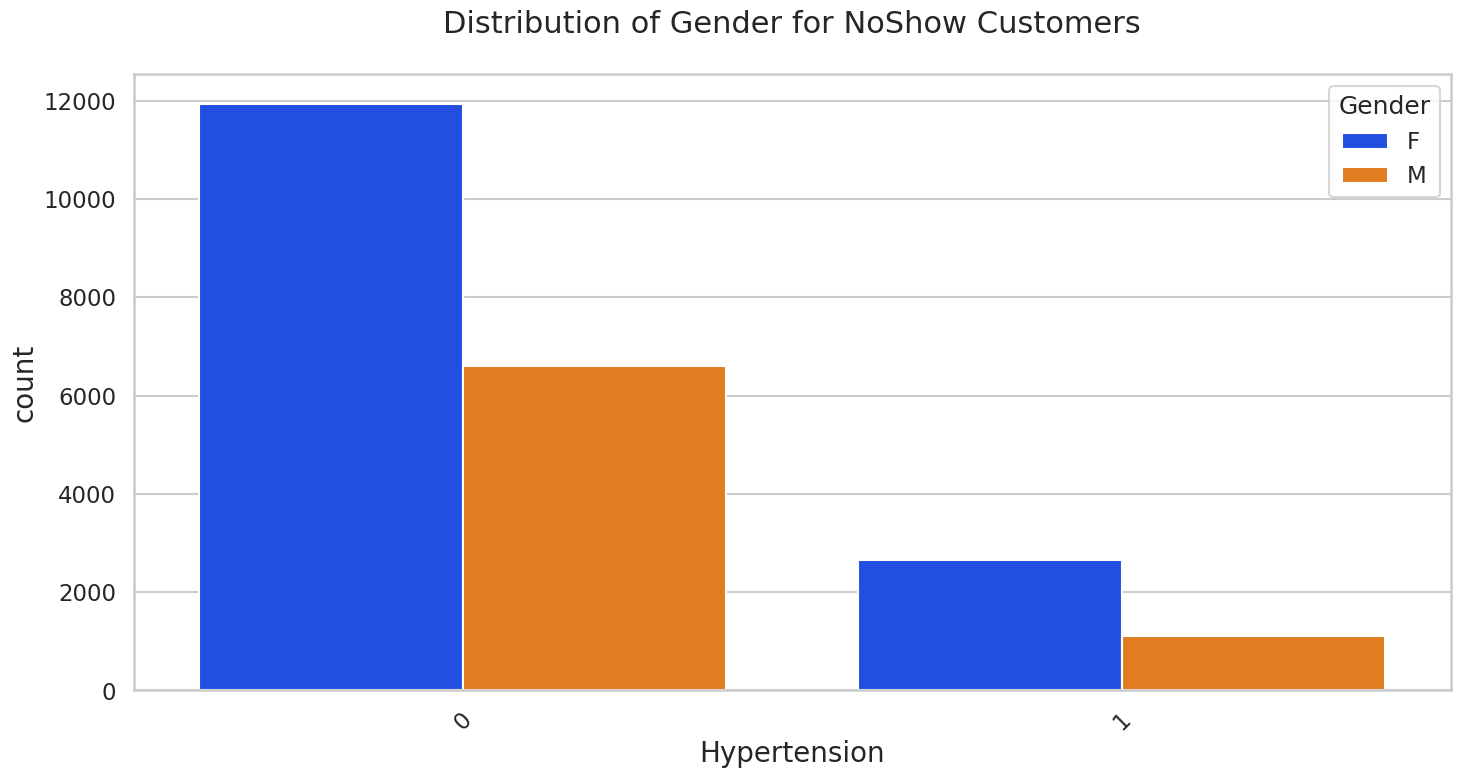

In [161]:
plot_grouped_bar(new_df1_target1,'Hypertension','Gender','Distribution of Gender for NoShow Customers',False)

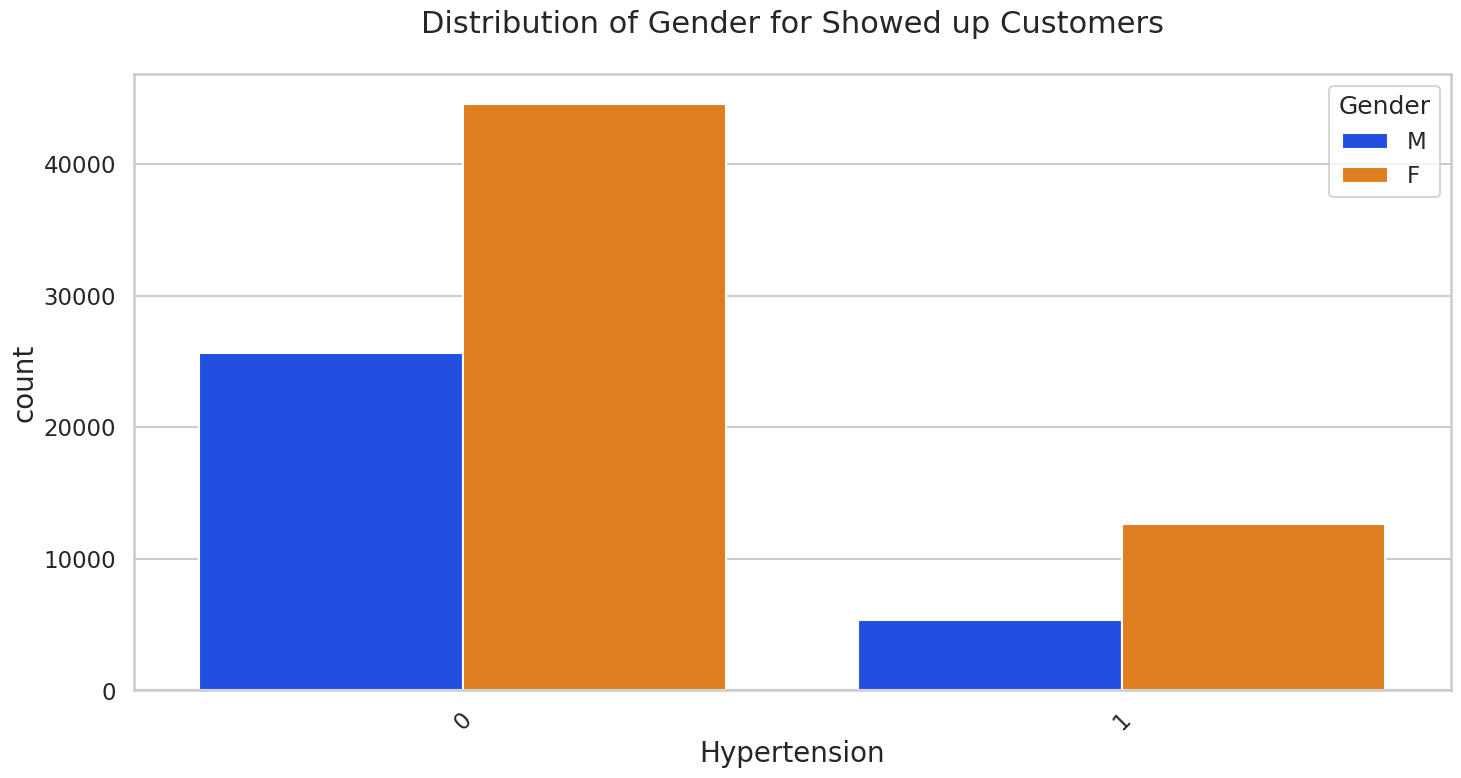

In [162]:
plot_grouped_bar(new_df1_target0,'Hypertension','Gender','Distribution of Gender for Showed up Customers',False)

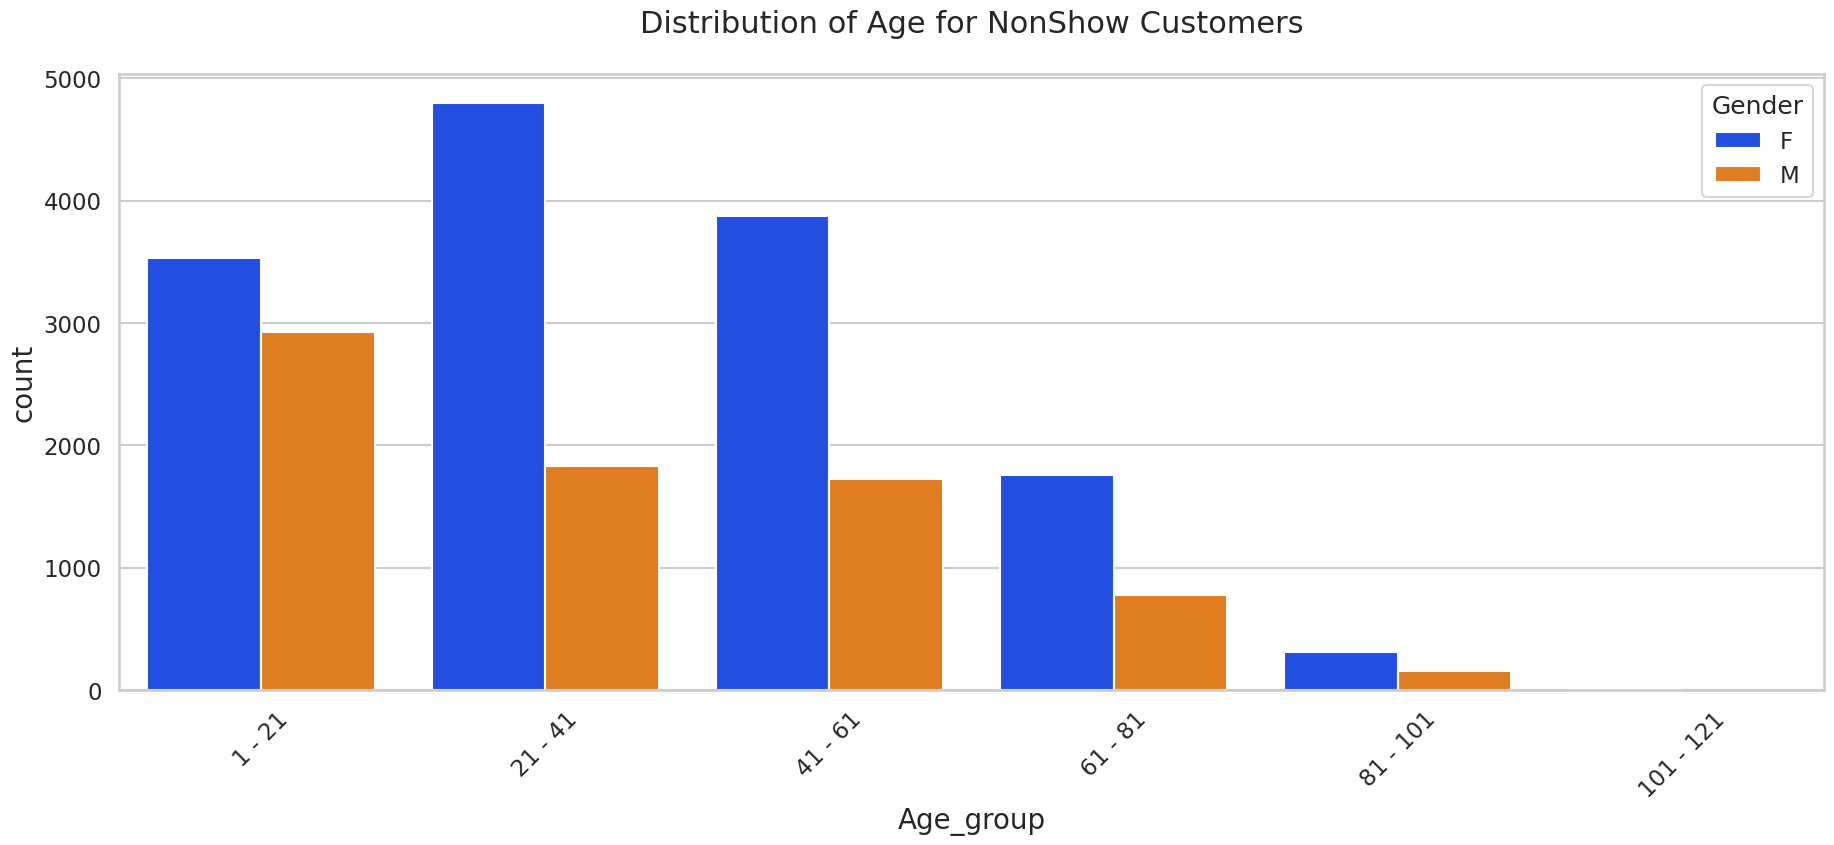

In [167]:
plot_grouped_bar(new_df1_target1,'Age_group','Gender','Distribution of Age for NonShow Customers',False)

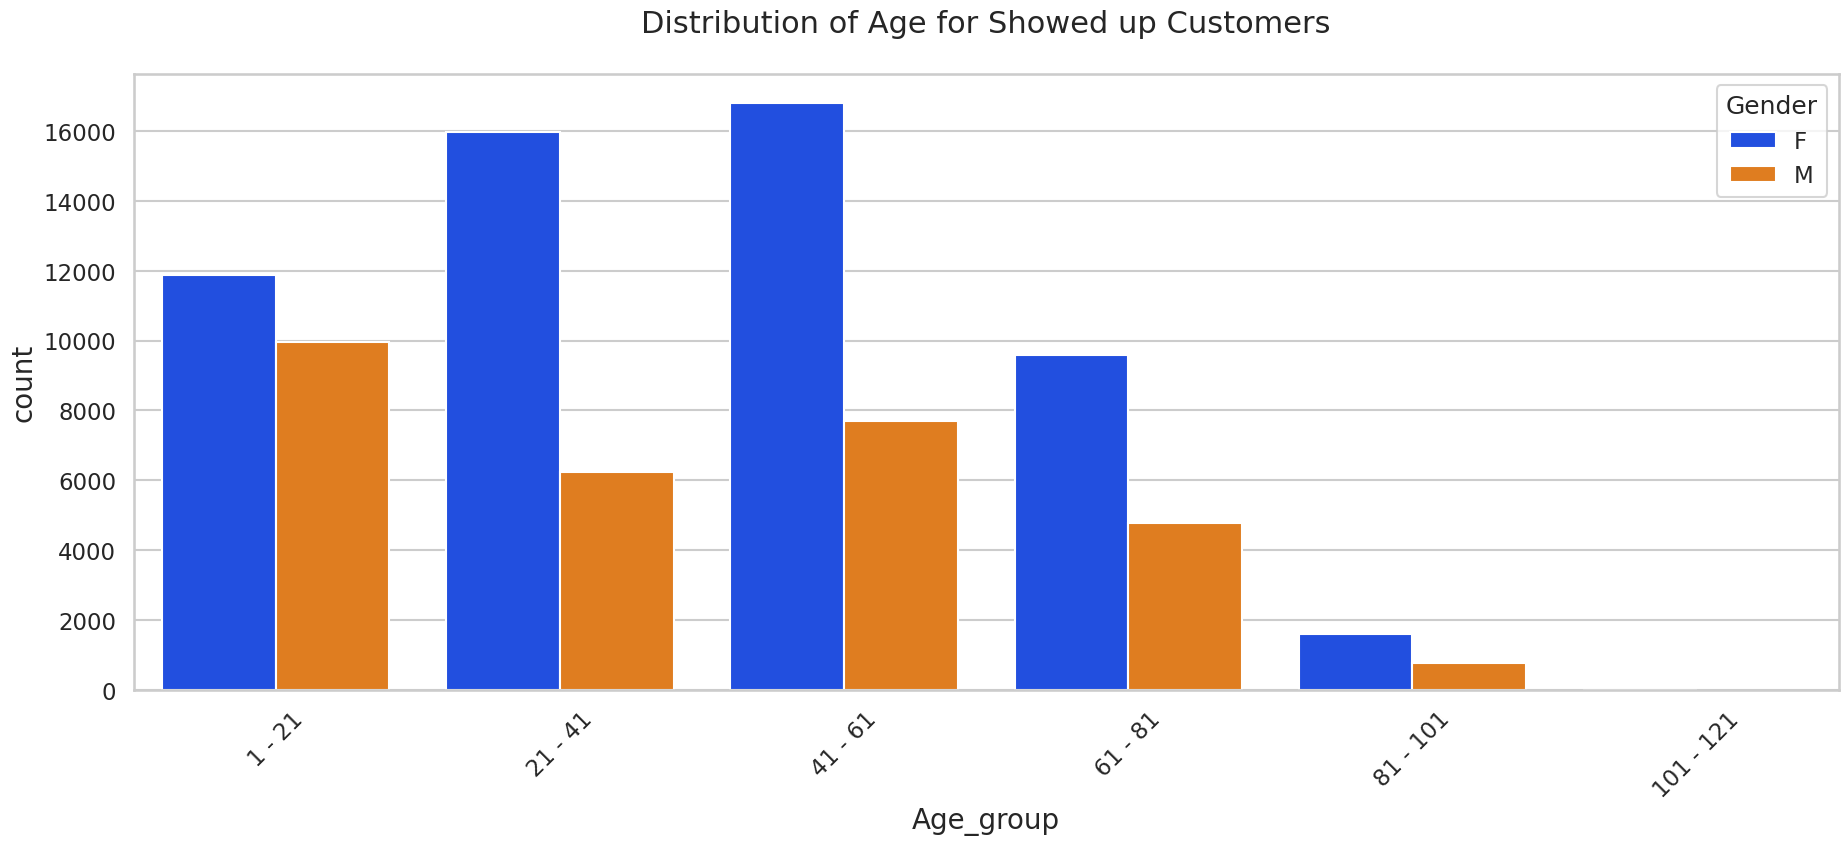

In [168]:
plot_grouped_bar(new_df1_target0,'Age_group','Gender','Distribution of Age for Showed up Customers',False)